# Algoritmo Quântico Variacional

#### Exemplo de algorítmo quantico variacional


Na aula do Tiago sobre convoluções quanticas ele mostrou a codificação de pixels em qubits, o valor de pixel é associado aos ângulos das portas de rotação em x.

In [2]:
import random
from qiskit import *
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [13]:
patch = np.random.random(size=(1,2))
patch.flatten()

array([0.66733133, 0.58182667])

[[0.00110221 0.00053291 0.00372715 ... 0.0034751  0.00302359 0.00313768]
 [0.00050305 0.00045303 0.00073551 ... 0.00345697 0.00341407 0.00342689]
 [0.00066928 0.0005317  0.00083966 ... 0.00363394 0.00327912 0.00320347]
 ...
 [0.00115898 0.00300849 0.0026352  ... 0.00082505 0.00040494 0.00045926]
 [0.00082297 0.00247501 0.00267728 ... 0.00106736 0.00046222 0.00051551]
 [0.00069407 0.00091172 0.00307112 ... 0.00038929 0.00033993 0.00042392]]


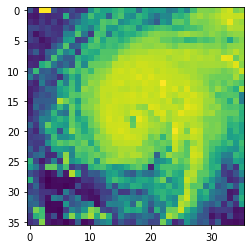

In [12]:
img = cv2.imread('a.png',0)/255
img = cv2.resize(img,(36,36))
print(img/255)
plt.imshow(img)

In [ ]:
import qiskit
from qiskit import QuantumCircuit
def transform_pixel_to_qubit(pixel_val):
    qc = QuantumCircuit(2,2)
    for i in range(2):
        qc.rx(pixel_val,i)
        qc.measure(i,i)
    return qc


##### Dúvidas

* Os angulos gerados aleatóriamente são uns dos parâmetros otimizaveis ?
* Como que é salvo o valor dos ângulos gerados aleatóriamente ? ( dict? json? )
* Até em que momento podemos utilizar o simulador para treinar esses parâmetros ?
* Qual é o limite qubits que podemos ter no simulador ?
* 